# K-Nearest Neighbour

### Data preprocessing

In [1]:
# Import the dataset
dataset = read.csv('Social_Network_Ads.csv')
dataset = dataset[, 3:5]

In [2]:
head(dataset, 10)

Age,EstimatedSalary,Purchased
19,19000,0
35,20000,0
26,43000,0
27,57000,0
19,76000,0
27,58000,0
27,84000,0
32,150000,1
25,33000,0
35,65000,0


In [3]:
# Splitting the dataset into the Training set and Test set
library(caTools)
set.seed(42)
split = sample.split(dataset$Purchased, SplitRatio = 0.8)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

In [4]:
head(training_set, 10)

,Age,EstimatedSalary,Purchased
3,26,43000,0
5,19,76000,0
6,27,58000,0
7,27,84000,0
8,32,150000,1
9,25,33000,0
10,35,65000,0
11,26,80000,0
12,26,52000,0
13,20,86000,0


In [5]:
head(test_set, 10)

,Age,EstimatedSalary,Purchased
1,19,19000,0
2,35,20000,0
4,27,57000,0
14,32,18000,0
22,47,49000,1
25,46,23000,1
27,49,28000,1
28,47,30000,1
29,29,43000,0
30,31,18000,0


In [6]:
# Feature Scaling
training_set[, 1:2] = scale(training_set[, 1:2])
test_set[, 1:2] = scale(test_set[, 1:2])

In [7]:
head(training_set, 10)

,Age,EstimatedSalary,Purchased
3,-1.1066818,-0.8376594,0
5,-1.8012650,0.1400883,0
6,-1.0074557,-0.3932286,0
7,-1.0074557,0.3771180,0
8,-0.5113248,2.3326133,1
9,-1.2059080,-1.1339465,0
10,-0.2136463,-0.1858276,0
11,-1.1066818,0.2586031,0
12,-1.1066818,-0.5710009,0
13,-1.7020388,0.4363754,0


In [8]:
head(test_set, 10)

,Age,EstimatedSalary,Purchased
1,-1.7475734,-1.2751466,0
2,-0.3943405,-1.2465719,0
4,-1.0709570,-0.1893075,0
14,-0.6480717,-1.3037213,0
22,0.6205841,-0.4179052,1
25,0.5360071,-1.1608477,1
27,0.7897383,-1.0179742,1
28,0.6205841,-0.9608247,1
29,-0.9018028,-0.5893535,0
30,-0.7326487,-1.3037213,0


### Fitting K-NN to the Training set and Predicting the test set result

In [19]:
library(class)
y_pred = knn(train = training_set[, -3], 
             test = test_set[, -3], 
             cl = training_set[, 3],
             k = 5)

In [21]:
head(y_pred, 10)

[1] 0 0 0 0 0 1 1 1 0 0
Levels: 0 1

In [24]:
head(test_set[, 3], 10)

[1] 0 0 0 0 1 1 1 1 0 0

* * *

**Predictions are almost correct.**

* * *

### Making the Confusion Matrix

In [25]:
cm = table(test_set[, 3], y_pred)
cm

   y_pred
     0  1
  0 47  4
  1  5 24

* * *

That's awesome. Only 5 + 4 = 9, incorrect prediction and 47 + 24 = 81 correct prediction.

* * *

### Visualizing the Training set results

In [26]:
# install.packages('ElemStatLearn')
library(ElemStatLearn)

In [35]:
set = training_set

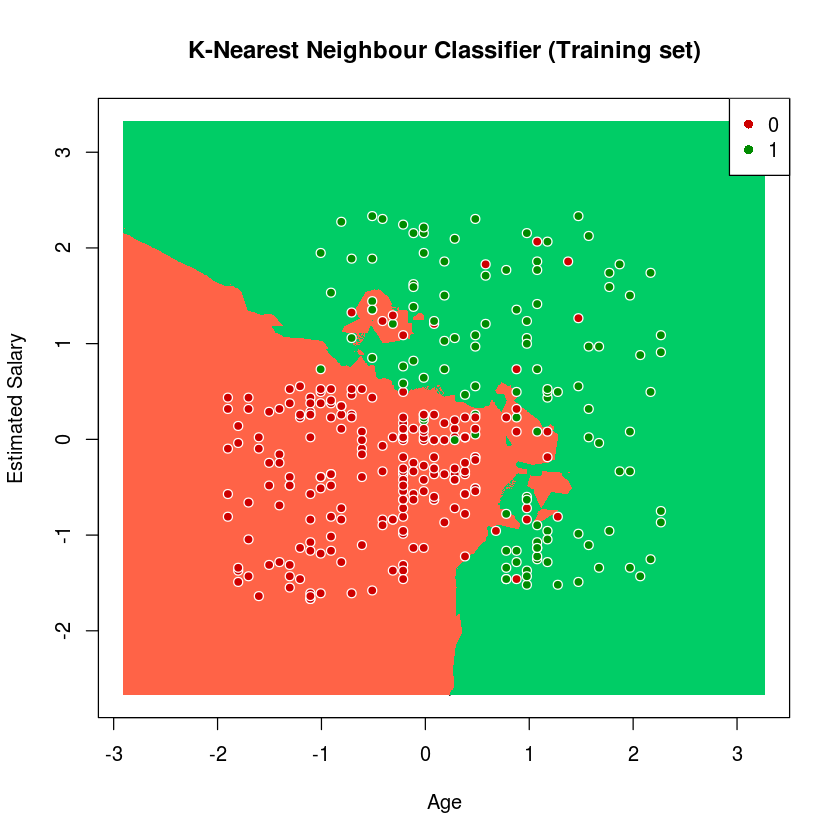

In [36]:
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = knn(train = training_set[, -3], 
             test = grid_set, 
             cl = training_set[, 3], 
             k = 5)
plot(set[, -3],
     main = 'K-Nearest Neighbour Classifier (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'), col='white')
legend("topright", legend = c("0", "1"), pch = 16, col = c('red3', 'green4'))

### Visualizing the Test set results

In [32]:
set = test_set

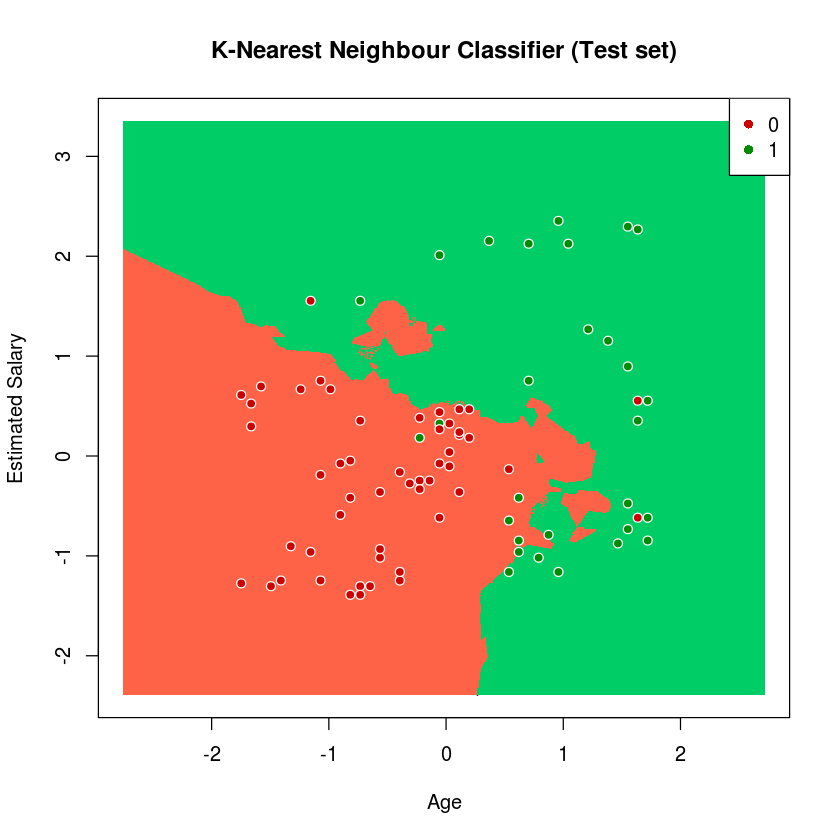

In [34]:
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
prob_set = predict(classifier, type = 'response', newdata = grid_set)
y_grid = knn(train = training_set[, -3], 
             test = grid_set, 
             cl = training_set[, 3], 
             k = 5)
plot(set[, -3],
     main = 'K-Nearest Neighbour Classifier (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'), col='white')
legend("topright", legend = c("0", "1"), pch = 16, col = c('red3', 'green4'))

* * *

**Gist: K-NN is a non Linear Classifier. That's why it predicts so well in our decision making problem.**
    
* * *